<h1>PROJECT CITYBIKE LUBLIN                               

<span style="color:green">Import all nessesary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

<h1>CITYBIKE 2017

<h3> 1.READ DATA

<span style="color:green">Let's read data from 2017.xlsx file.

In [2]:
city_bike2017 = pd.read_excel('2017.xlsx',sheet_name= ['marzec','kwiecień','maj'])

In [3]:
city_bike2017['marzec'].head()

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id
0,26627713,69277,2017-03-21 00:02:18,2017-03-21 00:02:44,315259,315259,0,991786
1,26627775,69756,2017-03-21 00:09:40,2017-03-21 00:22:59,673845,673845,0,864401
2,26627751,69631,2017-03-21 00:06:02,2017-03-21 00:23:46,673845,673845,0,864401
3,26627725,69455,2017-03-21 00:03:41,2017-03-21 00:27:37,315259,692596,100,991786
4,26627864,69692,2017-03-21 00:20:58,2017-03-21 00:28:56,315248,674263,0,868787


In [4]:
city_bike2017['kwiecień'].head()

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id
0,27188150,69486,2017-03-31 23:56:26,2017-04-01 00:00:12,315273,315273,0,1514820
1,27187806,69557,2017-03-31 23:45:38,2017-04-01 00:00:39,315272,315269,0,2024593
2,27187791,69269,2017-03-31 23:45:14,2017-04-01 00:01:13,315272,315269,0,2024593
3,27187827,69321,2017-03-31 23:46:13,2017-04-01 00:01:24,315272,315269,0,2024593
4,27187995,69344,2017-03-31 23:51:28,2017-04-01 00:01:55,315248,315233,0,983017


In [5]:
city_bike2017['maj'].head()

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id
0,28587694,69328,2017-04-30 23:57:00,2017-05-01 00:01:00,360123,315269,0,2043725
1,28587504,69174,2017-04-30 23:43:00,2017-05-01 00:02:00,315235,674353,0,865781
2,28587316,69391,2017-04-30 23:31:00,2017-05-01 00:02:00,315265,315248,100,975251
3,28587629,69507,2017-04-30 23:51:00,2017-05-01 00:02:00,315238,315236,0,1300588
4,28587614,69659,2017-04-30 23:50:00,2017-05-01 00:03:00,315242,315269,0,886601


In [6]:
#You have to merge dataframes by using 'append'

'''city_bike17 = city_bike2017['marzec'].append(city_bike2017['kwiecień'], ignore_index= True)
city_bike17 = city_bike17.append(city_bike2017['maj'], ignore_index= True)
city_bike17.sample(5)'''
city_bike17 = pd.concat(objs = [city_bike2017['marzec'],city_bike2017['kwiecień'],city_bike2017['maj']])
city_bike17.head(3)

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id
0,26627713,69277,2017-03-21 00:02:18,2017-03-21 00:02:44,315259,315259,0,991786
1,26627775,69756,2017-03-21 00:09:40,2017-03-21 00:22:59,673845,673845,0,864401
2,26627751,69631,2017-03-21 00:06:02,2017-03-21 00:23:46,673845,673845,0,864401


<span style="color:green">What would you like to  know about data?
    
<span style="color:green">Use DataFrame.info() and get information about:
    
<span style="color:green">-numbers of rows and coulmns 
    
<span style="color:green">-types of data
    
<span style="color:green">-are there missing values? 
    
<span style="color:green">-how many memory we need

In [7]:
city_bike17.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201078 entries, 0 to 105790
Data columns (total 8 columns):
uid               201078 non-null int64
bike_name         201078 non-null int64
start_time        201078 non-null datetime64[ns]
end_time          201078 non-null datetime64[ns]
start_place_id    201078 non-null int64
end_place_id      201078 non-null int64
price             201078 non-null int64
cust_id           201078 non-null int64
dtypes: datetime64[ns](2), int64(6)
memory usage: 13.8 MB


<span style="color:green">There are 201078 rows and 8 columns.

<span style="color:green">Dtypes: datetime64(2), int64(6)

<span style="color:green">There are not missing value - every columns has the same num non-null values

<span style="color:green">We use 13.8MB

In [8]:
#You can also use DataFrame.shape to get num of rows and columns and DataFrame.isnull to get num of non-null values
print(city_bike17.shape )
print(city_bike17.isnull().any().any()) #False means that you don't have any non-missing values

(201078, 8)
False


In [9]:
#Create additional TIME columns so it would be easier to manipulate the data

city_bike17['start_day'] = pd.DatetimeIndex(city_bike17['start_time']).dayofyear

city_bike17['start_month'] = pd.DatetimeIndex(city_bike17['start_time']).month

city_bike17['day_of_month'] = pd.DatetimeIndex(city_bike17['start_time']).day

city_bike17['day_of_week'] = pd.DatetimeIndex(city_bike17['start_time']).dayofweek



#Create additional duration column so it would be easier to manipulate the data

city_bike17['duration'] = city_bike17['end_time']-city_bike17['start_time']

city_bike17['duration_sec']= pd.TimedeltaIndex(city_bike17['end_time']-city_bike17['start_time']).seconds

city_bike17['duration_min'] = city_bike17['duration_sec'] / 60

city_bike17['duration_hour'] = city_bike17['duration_sec']/3600

city_bike17.sample(5)

,uid,bike_name,start_time,end_time,start_place_id,end_place_id,price,cust_id,start_day,start_month,day_of_month,day_of_week,duration,duration_sec,duration_min,duration_hour
18876,27018132,69769,2017-03-29 08:11:42,2017-03-29 08:18:28,673887,315235,0,1410716,88,3,29,2,00:06:46,406,6.766667,0.112778
31158,29305745,69551,2017-05-14 01:09:00,2017-05-14 01:23:00,315225,674370,0,1562648,134,5,14,6,00:14:00,840,14.000000,0.233333
67334,30067688,69798,2017-05-22 13:02:00,2017-05-22 13:43:00,315235,315243,100,779687,142,5,22,0,00:41:00,2460,41.000000,0.683333
11917,27380236,69205,2017-04-03 08:44:39,2017-04-03 08:59:25,673887,315236,0,973611,93,4,3,0,00:14:46,886,14.766667,0.246111
15231,26960650,69101,2017-03-28 13:47:14,2017-03-28 14:01:10,674338,674362,0,1025203,87,3,28,1,00:13:56,836,13.933333,0.232222


<h3>2.DATA ANALYSIS

In [10]:
#For how many days were the bikes available for rental?

num_of_days = city_bike17['start_day'].nunique()

print(f'The bikes were available for rental for {num_of_days} dyas')

The bikes were available for rental for 72 dyas


In [11]:
#How many rentals and bikes were there?

num_of_bikes = city_bike17['bike_name'].nunique()

num_of_rent = city_bike17['bike_name'].count()

print(f'Count of rentals:{num_of_rent}, \nCount of bikes: {num_of_bikes}')

Count of rentals:201078, 
Count of bikes: 850


In [12]:
#The average time of a rental:

avg_time = city_bike17['duration_min'].mean()

print(f'The average time of rental: {avg_time}')

The average time of rental: 16.490505011322302


In [13]:
#Rentals under 15 minutes

rentals_under_15 = len(city_bike17[city_bike17['duration_min']<15])

print('Num of rentals under 15 minutes:', rentals_under_15)

Num of rentals under 15 minutes: 135051


In [14]:
#Number of rentals per month, most popular month

month = {3:'March',4:'April',5:'May'}

top_month = city_bike17.groupby('start_month').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular month is: {month[top_month]}')

city_bike17.groupby('start_month').agg({'bike_name':'count'}).sort_values(by=['bike_name'], ascending=False)


The most popular month is: May


,bike_name
start_month,
5,105776
4,67152
3,28150


In [15]:
#Daily top score

city_bike17['date'] = pd.DatetimeIndex(city_bike17['start_time']).date

top_day = city_bike17.groupby('date').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular day: {top_day}')


city_bike17.groupby(['start_day']).agg({'bike_name':'count'}).sort_values(by=['bike_name'],ascending=False).head(1)


The most popular day: 2017-04-02


,bike_name
start_day,
92,6092


In [16]:
#Most popular start station

top_s_station = city_bike17['start_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_s_station}')

The most popular start station number: 315269


In [17]:
#Most popular end station

top_end_station = city_bike17['end_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_end_station}')

The most popular start station number: 315269


In [18]:
#How many bikes depart from each station monthly? 

city_bike17.groupby(['start_place_id','start_month'])[['bike_name']].count().head()

bike_name
start_place_id start_month           
0              5                    1
315225         3                  305
               4                  687
               5                 1111
315228         3                  354

In [19]:
#How many bikes return from each station monthly? 

city_bike17.groupby(['end_place_id','start_month'])[['bike_name']].count().head()

bike_name
end_place_id start_month           
315225       3                  301
             4                  693
             5                 1087
315228       3                  313
             4                  742

In [20]:
#Most rented bike

top_bike = city_bike17['bike_name'].value_counts().head(1).index[0]

#or

top_bike = city_bike17['bike_name'].value_counts().idxmax()

print(f'The most popular bike: {top_bike}')


The most popular bike: 69617


In [21]:
#Check if the most rented bike has visited all the stations during te season? If not what were the not visited stations?


mr_bike = city_bike17[city_bike17['bike_name'] == 69617]

print('The busiest bike visited', mr_bike['end_place_id'].nunique(),'return stations and',mr_bike['start_place_id'].nunique(),
      'departure stations.')

The busiest bike visited 76 return stations and 74 departure stations.


In [22]:
mr_bike = city_bike17[city_bike17['bike_name'] == 69617] #most rented bike

mr_bike['start_place_id'].unique() #stations which was visited by mr_bike

city_bike17['start_place_id'].unique() #all stations

pd.Series(mr_bike['start_place_id'].unique()) #you have to change ndarray to Series

pd.Series(mr_bike['start_place_id'].unique()).index #you need to get index, becouse in the nest step you will use drop method
                                                    #(this method demand a list of rows numbers )

pd.Series(city_bike17['start_place_id'].unique()).drop(pd.Series(mr_bike['start_place_id'].unique()).index) 
#you get list wiht not visited stations

74      315243
75      674094
76      315268
77      315275
78      674338
        ...   
830    3487961
831    3488365
832    3461463
833    3482377
834    3490696
Length: 761, dtype: int64

In [23]:
#Find the longest ride

longest_ride = city_bike17.sort_values(by = ['duration'],ascending=False)

longest_ride.head(10)

longest_ride['duration'].loc[60233]

60233   00:25:00
60233   00:16:27
Name: duration, dtype: timedelta64[ns]

<h3>3.PLOTS

In [24]:
#Create a plot for average rent number per month

average_rent = city_bike17.groupby('start_month').agg({'bike_name':'count'}) #I count num of rent per month

average_rent['num_day_in_month'] = city_bike17.groupby(['start_month'])[['day_of_month']].nunique() #I count num of days in month

average_rent['result'] = average_rent['bike_name']//average_rent['num_day_in_month'] #I count average rent number for every month

average_rent

,bike_name,num_day_in_month,result
start_month,,,
3,28150,11,2559
4,67152,30,2238
5,105776,31,3412


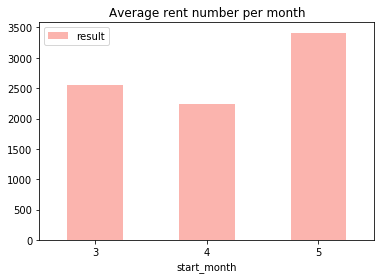

In [25]:
#Use matplotlib
average_rent['result'].plot(kind = 'bar', rot=360, title = 'Average rent number per month', legend = True, colormap = 'Pastel1');

In [ ]:
#This is the same plot but by using plotly

fig = go.FigureWidget(data=go.Bar(y=average_rent['result'], x = ['March','April','May']))
fig.update_layout(
    title={
        'text': 'Average rent number per month',
         'font': {
              'family': 'Calibri',
              'size': 30
        },'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='deeppink')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None

    )

fig.show()

In [ ]:
#Create a plot for average rent number per day of week

city_bike17['day_of_week'] = pd.DatetimeIndex(city_bike17['start_time']).dayofweek #I add a column with day of week 

rent_num_per_day = city_bike17.groupby('day_of_week').agg({'bike_name':['count']}) #I count num of rentals per day of week

rent_num_per_day

In [ ]:
num_of_day_df = pd.DataFrame(city_bike17.groupby(['date'])['day_of_week'].unique().value_counts()).sort_index()

rent_num_per_day['num_of_days']=num_of_day_df['day_of_week']

rent_num_per_day['num_per_day'] = rent_num_per_day['bike_name']['count'] / rent_num_per_day['num_of_days']

rent_num_per_day.round(2)

In [ ]:
fig = px.bar(rent_num_per_day, x=rent_num_per_day.index, y='num_per_day')
fig.update_layout(
    title={
        'text': "Number of rentals per day of week.",
         'font': {
              'family': 'Calibri',
              'size': 30
        },
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='pink')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None
    )
fig.show()

In [ ]:
#Create a plot for average time of rent per day of week

average_time_of_rent_per_day = city_bike17.groupby('day_of_week').agg({'duration_min':'mean'})
average_time_of_rent_per_day.reset_index(inplace=True)
average_time_of_rent_per_day

In [ ]:
average_time_of_rent_per_day.plot(x = 'day_of_week', y = 'duration_min', kind ='line',color='m');


In [ ]:
fig = go.Figure()
fig. add_trace(go.Bar(x=average_time_of_rent_per_day['day_of_week'], y=average_time_of_rent_per_day['duration_min']))
fig.update_layout(
    title={
        'text': 'Average time of rent per day',
         'font': {
              'family': 'Calibri',
              'size': 30
        },'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='mediumorchid')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None)

fig.show()

In [ ]:
#Create a plot for average number of rents per hour (so we can check for example
#how many rents on average are there during rush hours )
city_bike17['start_hour'] = pd.DatetimeIndex(city_bike17['start_time']).hour
ave_rent_per_h = city_bike17.groupby(['start_hour']).agg({'bike_name':'count'})
ave_rent_per_h

In [ ]:
ave_rent_per_h.plot(kind ='bar', figsize = (15,7), use_index=True, xticks = (range(24)),rot = 45, grid=True, colormap = 'spring');
                   

<h3>4.Conclusions

<span style="color:green">1. The bikes were available by 72 days
    
<span style="color:green">2. The number of available bikes: 850 and they were rented 201078 times
    
<span style="color:green">3. The average time of rent: 16.49
    
<span style="color:green">4. Count of rentals under 15 minutes: 135051 which is more than half all rentals
    
<span style="color:green">5. The most popular month was May, but the most popular day was 2017-04-02, it was Sunday
    
<span style="color:green">6. The most popular start and end station number: 315269
    
<span style="color:green">7. The most popular bike: 69617
 
<span style="color:green">8. The busiest bike visited 76 return stations and 74 departure stations, not visited 761 stations
    
<span style="color:green">9. The longest ride lasted 6 days 13:24:53
    
<span style="color:green">10. The average rent number per day of week was the highest on Monday and Tuesday
    
<span style="color:green">11. The average time of rent per day of week was the highest in Saturday (19.66) and Sunday (20.99)
    
<span style="color:green">12. The most popular hours for rent was beetwen  3 pm and 4 pm